# Projet de programmation : Morphing de visages
###### Par Eurydice Maucuer et Benjamin Patra

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

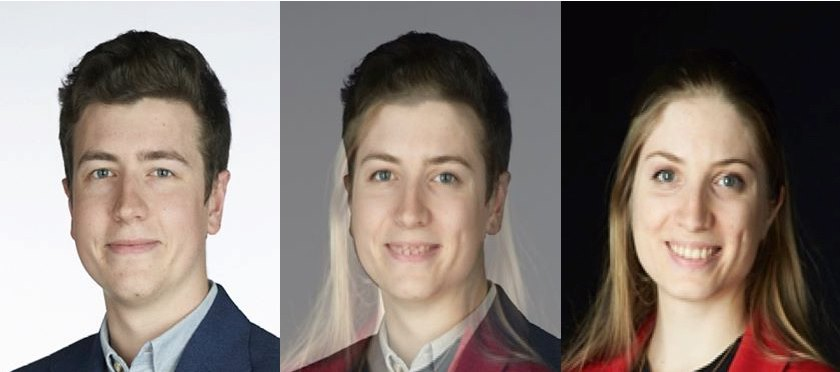

Avant toute chose, vous devez mettre les deux image que vous voulez morpher dans le même dossier sur votro ordinateur.
rentrer ensuite l'arborescence vers ce dossier, ainsi que le nom de vos deux fichiers dans le code si dessous (nomfichier1 et nomfichier2).
L'image de nom nomfichier doit également se situer dans le même dossier. Cette image sert uniquement à tester les fonctions au fur et à mesure.
ATTENTION: Il faut impérativement télécharger le fichier pré-entraîné à l'adresse suivante et le placer dans le dossier: https://github.com/italojs/facial-landmarks-recognition-/blob/master/shape_predictor_68_face_landmarks.dat?fbclid=IwAR3tc0tcJfRqOxc40nXmWnHE83iln7IhEM3xJut7mL2F9n3unfV9cEgN5DE


De plus il faut télécharger cv2 et dlib, nous nous excusons d'avance pour le temps passé à installer dlib, nous avons nous même passé 4 jours à l'installer pour qu'il ne fonctionne que sur notebook et pas sur pyzo, nous avons donc du revoir l'ensemble de la présentation de notre travail, initiallement prévue sous pyzo.

In [3]:
from imutils import face_utils
import dlib
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math as m
import os

In [4]:
dossier = "/Users/benji/Desktop/ProjetPython/"
#dossier="/Users/eurydicemaucuer/Desktop/ProjetPython/"

nomfichier1="anatole.jpg"
nomfichier2="cesar.jpg"

nomfichier="benjamin.jpg"

alpha=0.4 #vous pouvez bien entendu jouer avec cette valeur pour voir la différence 
          #(si alpha=0 vous obtiendrez l'image1 si alpha=1 vous obtiendrez l'image2)

nf=nomfichier[0 : len(nomfichier)-4]


im = cv2.imread(dossier+nomfichier)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im_copie=im.copy() 

## 1. Première étape 
Pour faire du morphing de visages, la première étape consiste à chercher sur une image de visage les points importants de celui-ci (les sourcils, les yeux, le nez, la bouche..).
Pour cela, nous utilisons dlib qui ainsi qu'un modèle de reconnaissance préentrainer.

Le travail dans cette partie se décompose en 7 grandes étapes :

A) Reconnaitres les points importants du visage sur l'image originale

B) Trouver le rectangle le plus petit qui englobe l'ensemble des points trouvés

C) Elargir le rectangle trouvé pour que l'ensemble du visage soit inclus dedans

D) Extraire le rectangle de l'image initiale et enregistrer l'image recadrée

E) Chercher à nouveau les points importants mais sur l'image recadrée 
<br>Rajouter des points sur les bords de l'image (1 à chaque coin + 1 au milieu de chaque côté)
<br>Enregistrer cette liste de points sous un fichier txt

### 1.a Trouver les points importants du visage

In [5]:
def points_visage(dossier,image):
    p = dossier +"shape_predictor_68_face_landmarks.dat" # Modèle préentrainé
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(p)

    # On convertit l'image en nuance de gris
    img_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(img_gris, 0)

    # Pour chaque visage trouvé, on cherche les points du visage
    for (i, rect) in enumerate(rects):
    # Make the prediction and transfom it to numpy array
        points = predictor(img_gris, rect)
        points = face_utils.shape_to_np(points)
    
    #On trace sur une nouvelle image les points trouvés
    resultat=image.copy()
    
    taille=image.shape

    for (x, y) in points:
        cv2.circle(resultat, (x, y), m.floor(taille[0]*0.004), (0, 255, 0), -1)
    
    #On affiche le résultat obtenu avec pyplot
    plt.imshow(resultat)
    plt.show()
    resultat = cv2.cvtColor(resultat, cv2.COLOR_BGR2RGB)
    cv2.imwrite(os.path.join(dossier , dossier+"img6.jpg"),resultat)
    
    return points

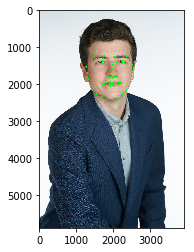

In [6]:
pts=points_visage(dossier,im_copie)

### 1.b : Trouver le plus petit rectangle contenant tous les points

Nous cherchons à isoler le visage de l'individu, pour cela après avoir obtenu des points caractéristiques du visages on créé un rectagle reliant les points extrêmaux du visage, en agrandissant ce rectangle on pourra ainsi isoler le visage de la personne.

In [7]:
def rect_visage(img,points):
    min_long=np.inf
    min_larg=np.inf
    max_long=0
    max_larg=0

    for (x,y) in points :
        if x<min_larg:
            min_larg=x
        if x>max_larg:
            max_larg=x
        if y<min_long:
            min_long=y
        if y>max_long:
            max_long=y
            
    #On trace le plus petit rectangle contenant tous les points touvés puis on affiche l'image
    taille=img.shape
    img=cv2.rectangle(img,(min_larg,min_long),(max_larg,max_long),(0,255,0),m.floor(taille[0]*0.0035))
    plt.imshow(img)
    plt.show()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(os.path.join(dossier , dossier+"img5.jpg"),img)
    
    return(min_larg,max_larg,min_long,max_long)

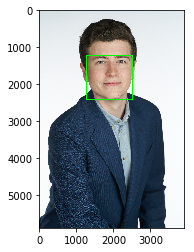

In [8]:
min_larg,max_larg,min_long,max_long=rect_visage(im_copie,pts)

### 1.c Élargir le rectangle trouvé

Nous cherchons à extraire le visage entier de la photo, nous avons décidé d'élargir le rectangle obtenu à l'étape précédente afin que l'ensemble du visage de l'individu soit à l'intérieur de ce triangle. Pour cela nous avons fait le choix de rajouter "une moitié de visage" de chaque côté du rectangle.

In [9]:
def elargissement(img,points):
    min_larg,max_larg,min_long,max_long=rect_visage(img,points)
    longueur=max_long-min_long
    largeur=max_larg-min_larg
    
    haut_gauche=(m.floor(min_larg-largeur/2),min_long-longueur)
    bas_droite=(m.floor(max_larg+largeur/2),m.floor(max_long+longueur/2))
    
    taille=img.shape
    img=cv2.rectangle(img,bas_droite,haut_gauche,(0,0,255),m.floor(taille[0]*0.0035))
    plt.imshow(img)
    plt.show()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(os.path.join(dossier , dossier+"img4.jpg"),img)
    
    return (bas_droite,haut_gauche)

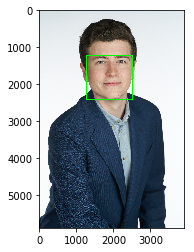

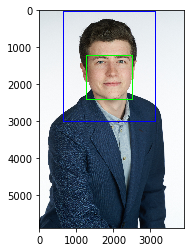

((3146, 3004), (652, 34))

In [10]:
bd,hg=elargissement(im_copie,pts)
bd,hg

On affiche l'image initiale pour s'assurer qu'elle n'a pas été modifiée

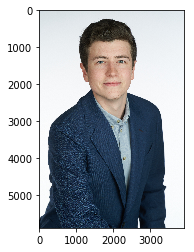

In [11]:
plt.imshow(im)
plt.show()

### 1.d : Recadrement de l'image puis enregistrement en fichier jpg

Le rectangle bleu correspond à l'image que l'on veut extraire, on l'extrait grâce au code suivant. De plus, nous cherchons à combiner deux images afin d'en obtenir qu'une, or ces images peuvent avoir des tailles différentes, il faut donc redimensionner les images obtenues. Nous avons choisi de les redimensionner à la taille 800x600, ce sera donc la taille de l'image finale

In [12]:
def recadrement(img,nf,bas_droite,haut_gauche):
    taille=img.shape
    
    #on gère le cas ou le rectangle bleu déborde de l'image :
    bd0=min(bas_droite[0],taille[1])
    bd1=min([bas_droite[1],taille[0]])
    hg0=max([haut_gauche[0],0])
    hg1=max([haut_gauche[1],0])
    
    img_reduite=img[hg1:bd1,hg0:bd0]

    plt.imshow(img_reduite)
    plt.show()
    
    #on redimenssionne l'image recadrée
    new_img_reduite=cv2.resize(img_reduite, (600,800),interpolation = cv2.INTER_AREA)
    
    plt.imshow(new_img_reduite)
    plt.show()
    
    new_img_reduite = cv2.cvtColor(new_img_reduite, cv2.COLOR_BGR2RGB)
    cv2.imwrite(os.path.join(dossier , nf+"_recadre.jpg"),new_img_reduite)
    
    new_img_reduite = cv2.cvtColor(new_img_reduite, cv2.COLOR_BGR2RGB)
    return new_img_reduite

Puis on enregitre l'image après avoir remis les couleurs comme il faut (pyplot affiche en RGB et l'ordi en BGR)

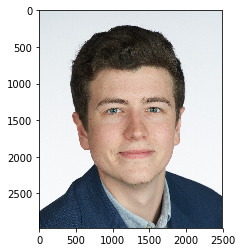

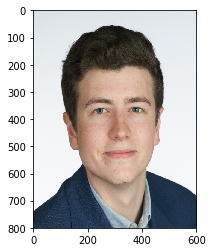

In [13]:
im_reduite=recadrement(im,nf,bd,hg)

### 1.e : Chercher les points importants du visage sur l'image recadrée
il suffit de réutiliser la fonction codée dans la partie 1.a sur l'image recadrée 

In [14]:
def fun(dossier,img_reduite):
    img_red_copie=img_reduite.copy()
    
    pts=points_visage(dossier,img_reduite)
    
    taille=img_reduite.shape
    
    #on rajoute les points sur les bords
    new_points=[[0,0],[0,400],[ 0 , 799 ],[ 300 ,  0],[ 300 , 799 ],[ 599, 0 ]
,[ 599, 799 ]]
   
    new_points=np.array(new_points)
    
    pts = np.concatenate((pts,new_points), axis=0)
    
    
    for (x, y) in pts:
        cv2.circle(img_reduite, (x, y), m.floor(taille[0]*0.004), (0, 255, 0), -1)
    
    #On affiche le résultat obtenu avec pyplot
    plt.imshow(img_reduite)
    plt.show()
    return(img_red_copie,pts)

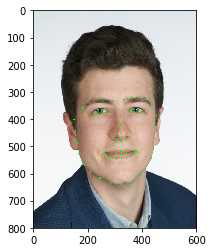

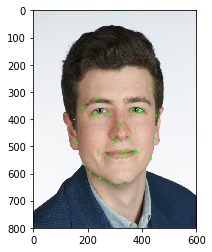

In [15]:
im_rec,pts=fun(dossier,im_reduite)

In [16]:
def fichiertxt(mat):              # matrice de type liste de listes
    with open (os.path.join(dossier,nf+"test.txt"), "w") as f : # création d'un fichier en mode écriture
        for i in range (0,len (mat)) :               # 
            for j in range (0, len (mat [i])) :      # 
                s = str (mat [i][j])                 # conversion en chaîne de caractères
                f.write (s + "\t")                   #
            f.write ("\n")                           # 

In [17]:
def convertir_array(array):
    new=[]
    for (x,y) in array :
        new.append((int(x),int(y)))
    return new

In [18]:
pts=convertir_array(pts)

## 2. Deuxième étape
Cette étape consiste à effectuer une triangulation de Delaunay sur la liste des points obtenus dans l'étape précédente.

In [19]:
#fonction qui regarde si un point appartient à un rectangle
def rect_contient(rect, pt) :
    if pt[0] < rect[0] :
        return False
    elif pt[1] < rect[1] :
        return False
    elif pt[0] > rect[2] :
        return False
    elif pt[1] > rect[3] :
        return False
    return True

In [20]:
def point_dans_liste(l,pt):
    for i in range(len(l)) :
        x,y=l[i]
        if pt[0]==x and pt[1]==y:
            return i
    return (-1)

### Partie Numérique et description algorithme

On réalise une triangulation de Delaunay pour créer des triangles qui permettront de fusionner les visages.
La triangulation de Delaunay est un type de partitionnement d'un ensemble de points qui consiste à construire des triangles tels qu'il n'y est aucun point dans le cercle circonscrit de chaque triangle, c'est ce qu'on appelle le critère du cèrcle.

In [21]:
def dessiner_delaunay(img, subdiv, couleur,liste_points ) :

    Ltriangle = subdiv.getTriangleList();
    taille = img.shape
    r = (0, 0, taille[1], taille[0])
    
    liste_tri=[]
    
    for t in Ltriangle :
        
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        
        if rect_contient(r, pt1) and rect_contient(r, pt2) and rect_contient(r, pt3) :
        
            cv2.line(img, pt1, pt2, couleur, 2)
            cv2.line(img, pt2, pt3, couleur, 2)
            cv2.line(img, pt3, pt1, couleur, 2)
            ind1=point_dans_liste(liste_points,pt1)
            ind2=point_dans_liste(liste_points,pt2)
            ind3=point_dans_liste(liste_points,pt3)
            
            liste_tri.append((ind1,ind2,ind3))
    
    return liste_tri

Pour effectuer une triangulation de Delaunay:
* On ajoute les points un à un
* On recalcule la triangulation sur les parties du graphe affectées par l'ajout du point.
    * En ajoutant un sommet 3 arrêtes partent de ce sommet, deux nouveaux triangles sont créés.
    * On applique alors l'algorithme de basculement.
        * L'algorithme de Basculement consiste à faire "basculer le triangle" s'il ne respecte pas le critère du cercle.

Détail Algorithme de Basculement:

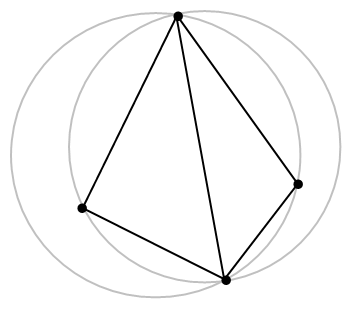

Les triangles ainsi formé ne sont pas conforment au critère du cercle en effet, les cerlces circonscrits des deux triangles ne sont pas vides.

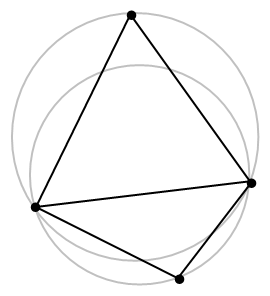

Alors que dans cette configuration les triangles respectent ce critère ont dit que le triangle a basculé.

Complexité: Pour chaque point on cherche donc le triangle qui le contient on donc une complexité de O(n²)

In [22]:
def triangulation(img,liste_points):
    
    # copie de l'image
    img_copie = img.copy();
    
    # Rectangle à utiliser dans Subdiv2D
    taille = img.shape
    rect = (0, 0, taille[1], taille[0])
    
    subdiv = cv2.Subdiv2D(rect);
    
    # On met les points trouvés dans subdiv
    for p in liste_points :
        subdiv.insert(p)
        
    # Dessin des trianges de Delaunay
    liste_tri=dessiner_delaunay( img, subdiv, (0, 0, 255),liste_points );

    # on dessine un point à chaque sommet de triangle
    for p in liste_points :
        cv2.circle( img, p, 5, (255,0,0))

    # on affiche le résultat
    plt.imshow(img)
    plt.show()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(os.path.join(dossier , dossier+"img3.jpg"),img)
    
    return liste_tri

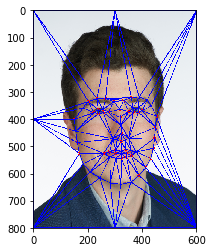

In [23]:
tri=triangulation(im_rec,pts)

In [24]:
#tri

## 3. Troisième étape

La troisième étape est le centre du programme, elle permet de réellement fusionner les deux images afin de réaliser le morphing des deux visages. Pour cela nous allons combiner les triangles dont nous avons obtenu la liste des points à la question 2.
En détail c'est à dire:

* Nous avons maintenant une liste de 75 points pour l'image 1 et une autre liste de 75 points pour l'image 2.
    La première chose que nous devons faire ici est de créer une liste de 75 points pour l'image finale qui fusionnera les 2 visages. Pour cela, on va utiliser l'équation suivante : <br>
    Soit $x_1,y_1$ un point dans la liste de points de l'image 1 et $x_2,y_2$ provenant de la liste de points de l'image 2. <br>
    Les coordonnées du point correspondant pour l'image morphée M sont :
    $$x_m=(1-\alpha x_1)+ \alpha x_2$$
    $$y_m=(1-\alpha y_1)+ \alpha y_2$$
    
* Nous disposons alors d'une liste de 75 points pour l'image 1, l'image 2 et avons crée une liste de 75 points pour l'image morphée.
 Grace à la partie précédente, nous possédons également la triangulation de Delaunay associée à ses points.
 Il faut maintenat trouver la transformation affine permettant de passer d'un triangle provennant de l'image 1 au triangle de l'image morphée associé. Une fois ceci fait pour tous les triangles de l'image 1 on répète le procédé sur l'image 2.
 *  Ensuite pour chaque triangle de l'image 1 on le déforme afin qu'il "rentre" dans le triangle corresonpant dans l'image finale. On fait cela grace à la fonction FillConvexPOly. On répète le procédé sur l'image 2.
 * Nous possédons à présent les deux images déformées avec des triangles se coorespondant parfaitement. Il ne reste plus qu'a mélanger les deux images en utilisant l'équation suivante :
 $$ M(x_m,y_m)=(1-\alpha)Im1(x_i,y_i)+\alpha Im2(x_j,y_j)$$

In [25]:
def transformation_affine(src, srcTri, dstTri, taille) :
    
    warpMat = cv2.getAffineTransform( np.float32(srcTri), np.float32(dstTri) )
    
    dst = cv2.warpAffine( src, warpMat, (taille[0], taille[1]), None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101 )

    return dst

La fonction qui suit permet à partir de deux triangles de deux images différentes de construire un unique triangle de l'image finale.

In [26]:
def fusion_triangle(img1, img2, img, t1, t2, t, alpha) :
 
    r1 = cv2.boundingRect(np.float32([t1]))
    r2 = cv2.boundingRect(np.float32([t2]))
    r = cv2.boundingRect(np.float32([t]))

    t1Rect = []
    t2Rect = []
    tRect = []
    
    for i in range(0, 3):
        tRect.append(((t[i][0] - r[0]),(t[i][1] - r[1])))
        t1Rect.append(((t1[i][0] - r1[0]),(t1[i][1] - r1[1])))
        t2Rect.append(((t2[i][0] - r2[0]),(t2[i][1] - r2[1])))

    masque = np.zeros((r[3], r[2], 3), dtype = np.float32)
    cv2.fillConvexPoly(masque, np.int32(tRect), (1.0, 1.0, 1.0), 16, 0);

    img1Rect = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]
    img2Rect = img2[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]]

    taille = (r[2], r[3])
    #nous réalisons la transformation affine
    warpImage1 = transformation_affine(img1Rect, t1Rect, tRect,taille)
    warpImage2 = transformation_affine(img2Rect, t2Rect, tRect,taille)
    
    #application de la formule explicitée plus haut
    imgRect = (1.0 - alpha) * warpImage1 + alpha * warpImage2

    img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] = img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] * ( 1 - masque ) + imgRect * masque


In [27]:
def morph_visage(img1,img2,points1,points2,tri,alpha):
    #création de la liste de points pour l'image morphée
    points=[]
    
    for i in range(0, len(points1)):
        #formule vue plus haut pour trouver les points de l'image morphée
        x = ( 1 - alpha ) * points1[i][0] + alpha * points2[i][0] 
        y = ( 1 - alpha ) * points1[i][1] + alpha * points2[i][1]
        points.append((x,y))

    #création d'une image vierge qui comportera l'image morphée
    imgMorph = np.zeros(img1.shape, dtype = img1.dtype)

    #on récupère les coordonnées des points correspondant à chaque triangle de la liste des triangles.
    for x,y,z in tri :
            t1 = [points1[x], points1[y], points1[z]]
            t2 = [points2[x], points2[y], points2[z]]
            t = [ points[x], points[y], points[z] ]

            # On applique la fonction morph_triangle qui permet d'associer les triangles
            fusion_triangle(img1, img2, imgMorph, t1, t2, t, alpha)


    # On affiche le résultat
    plt.imshow(imgMorph)
    plt.show()
    
    # On repasse l'image dans les bonnes couleurs
    imgMorph = cv2.cvtColor(imgMorph, cv2.COLOR_BGR2RGB)
    # On enregistre notre image finale
    cv2.imwrite(os.path.join(dossier , dossier+"imagemorphing.jpg"),imgMorph)

## 4.Tests unitaires

On introduit des tests unitaires afin de vérifier que nos fonctions renvoies, des listes et images de la taille souhaitée. La fonction "fun" doit notamment renvoyée une image recadrée de taille 800x600 ainsi qu'une liste de 75 points quelque soit l'image.
Nous avons perdus beaucoup de temps sur les tests unitaires car ils rencontrent des problèmes d'éxécution sur Jupyter, cependant nous sommes contraint d'éxécuter le programme sous Jupyter car comme vu précédemment nous ne sommes pas parvenus à installer le package dlib pour qu'il fonctionne sur pyzo.

import unittest
class TestProjet(unittest.TestCase):
    
    def test_fun(self):
        pts = fun(dossier)[1]
        self.assertEqual(pts,75) 
    
    def test_funimage(self):
        imagetest = fun(dossier)[0]
        h,l = imagetest.shape
        self.assertEqual((h,l),(800,600)) 
        
if __name__ == '__main__':
    unittest.main()

## 5.Fonction Finale

In [28]:
def fonction_finale(nomfichier_1,nonmfichier_2,dossier,alpha):
    
        #Pour enlever l'extension jpg 
    nf1=nomfichier1[0 : len(nomfichier1)-4] 
    nf2=nomfichier2[0 : len(nomfichier2)-4]

        # On lit les images :
    im1 = cv2.imread(dossier+nomfichier1)
    im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
    im1_copie=im1.copy() #On fait une copie, on ne touchera pas au fichier im1

    im2 = cv2.imread(dossier+nomfichier2)
    im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
    im2_copie=im2.copy() #On fait une copie, on ne touchera pas au fichier im2

        #Travail sur l'image 1
    pts1=points_visage(dossier,im1_copie)
    bd1,hg1=elargissement(im1,pts1)
    im1_reduite=recadrement(im1_copie,nf1,bd1,hg1)
    im1_reduite,pts1=fun(dossier,im1_reduite)
    pts1=convertir_array(pts1)
    tri=triangulation(im1_reduite,pts1)
    
       #Travail sur l'image 2 
    pts2=points_visage(dossier,im2_copie)
    bd2,hg2=elargissement(im2,pts2)
    im2_reduite=recadrement(im2_copie,nf2,bd2,hg2)
    im2_reduite,pts2=fun(dossier,im2_reduite)
    pts2=convertir_array(pts2)
    tri=triangulation(im2_reduite,pts2)
    
     #Réouverture de l'image 1 recadrée afin que les points, rectangle, triangle n'apparaissent pas sur l'image finale.
    im1_red= cv2.imread(dossier+nf1+"_recadre.jpg")
    im1_red = cv2.cvtColor(im1_red, cv2.COLOR_BGR2RGB)
    
     #Réouverture de l'image 2 recadrée pour les mêmes raisons
    im2_red= cv2.imread(dossier+nf2+"_recadre.jpg")
    im2_red = cv2.cvtColor(im2_red, cv2.COLOR_BGR2RGB)
    
    #Appel de la fonction finale
    morph_visage(im1_red,im2_red,pts1,pts2,tri,alpha)
    


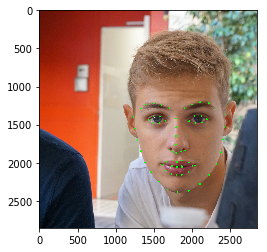

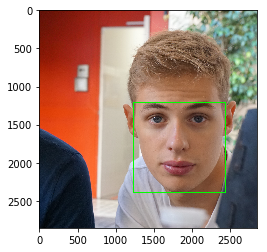

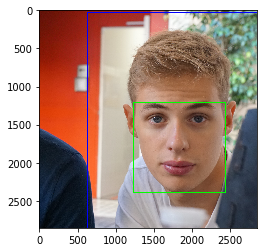

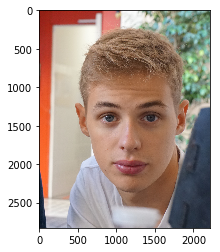

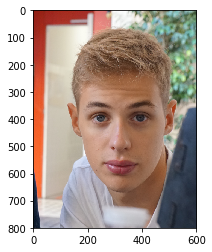

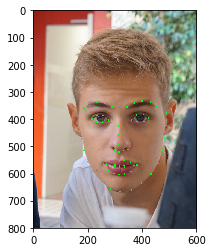

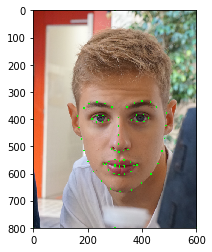

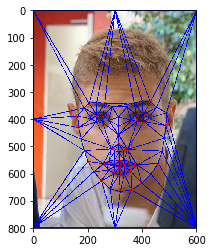

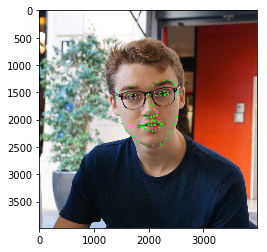

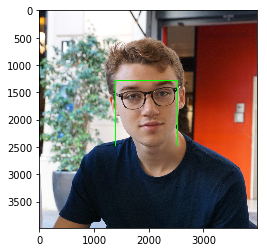

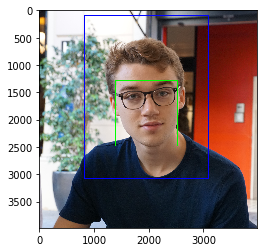

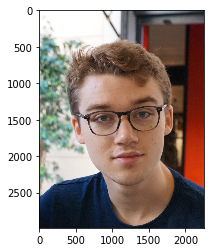

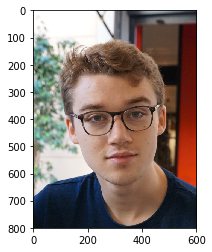

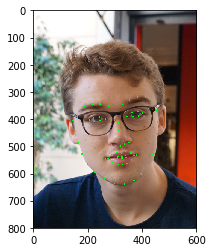

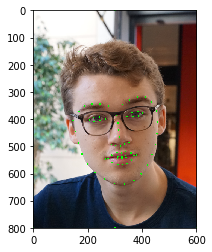

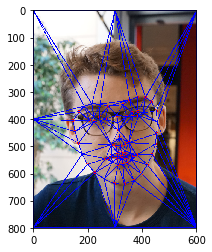

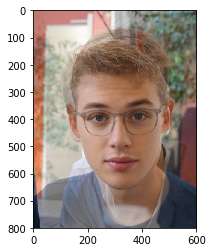

In [29]:
fonction_finale(nomfichier1,nomfichier2,dossier,alpha)

#vous pouvez trouver l'image morphée dans le dossier sur votre ordinateur

### Commentaire résultat : 

Notre programme permet bien de créer un unique visage à partir deux individus, les applications de ce procédé sont nombreuses. D'un point de vue "loisir" ce procédé de morphing est proposé sur l'application snapchat qui compte 188 millions d'utilisateurs actifs. De plus ces procédés peuvent trouver une utilité dans la réalisation d'effet spéciaux au cinéma cependant dans ce cas le morphing a lieu en vidéo et non pas sur une image arrêtée. L'idée du sujet nous est venue en visionnant ce reportage sur les "deep-fake" https://www.youtube.com/watch?v=z1MMVNCB5MU&t=2s où là aussi l'importante différence et difficulté réside dans le fait que le morphing soit réalisé sur un visage en mouvement.